In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('heartdiseases.csv')

In [5]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
scaler.fit(df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features=scaler.transform(df.drop('target',axis=1))

In [10]:
scaled_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [11]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df_feat
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
pred=knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics

In [20]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[192   4]
 [  7 207]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.97      0.97       214

    accuracy                           0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [21]:
error_rate=[]
 
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

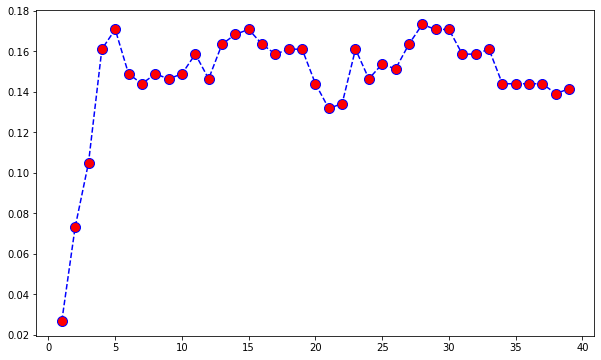

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[192   4]
 [  7 207]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.97      0.97       214

    accuracy                           0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [24]:
acc=metrics.accuracy_score(y_test,pred)
prec=precision_score(y_test,pred)

In [25]:
print("Accuracy :",acc)
print("Precision :",prec)

Accuracy : 0.973170731707317
Precision : 0.981042654028436


# ROC Curve

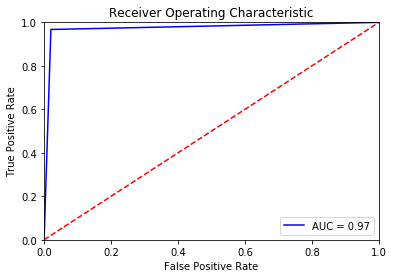

In [26]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision and recall tradeoffs for different threshold values

In [27]:
### Predict y_test values and probabilities based on fitted knn model
pred_y=knn.predict(X_test) 

probs_y=knn.predict_proba(X_test) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

probs_y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

(0, 1)

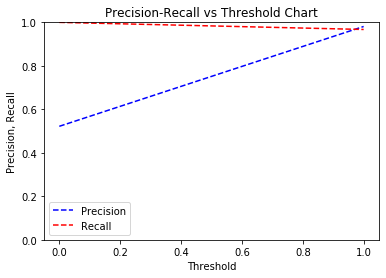

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds,precision[:-1],"b--",label="Precision")
plt.plot(thresholds,recall[: -1],"r--",label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])